# Lab 4: Basic data exploration, logistic regression, and basic evaluation

#### We will start by importing numpy, pandas, and matplotlib. (We will import other libraries/packages as we need them.) We will also read our spambase csv file into a pandas dataframe.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spambase = pd.read_csv('spambase.csv')

#### Let's take a quick look at what we read in.

In [4]:
# data exploration

# print the columns that were read in
print ('Spam database columns')
print (spambase.columns)

# show the mean of the values by class
print ('\n\nMean of column values grouped by spam class:')
print (spambase.groupby('spam_class').mean())

# crosstab of spam_class and word_freq_money
# this prints the frequencies of the various values of the feature word_freq_money by class
print ('\n\nFrequenct of word_fred_money values by class:')
print(pd.crosstab(spambase.word_freq_money, spambase.spam_class.astype(bool)))



Spam database columns
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'w

#### Let's use some charts and graphs to visualize the data.

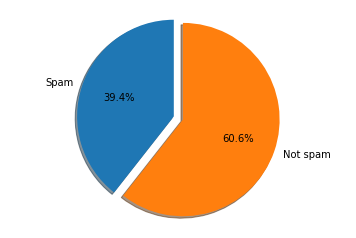

In [5]:
# visualize data


# generate a pie chart showing the distribution of the two classes
spam_size = spambase[spambase['spam_class']==1].shape[0]
nonspam_size = spambase[spambase['spam_class']==0].shape[0]
labels = 'Spam', 'Not spam'
sizes = [spam_size, nonspam_size]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Spam')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

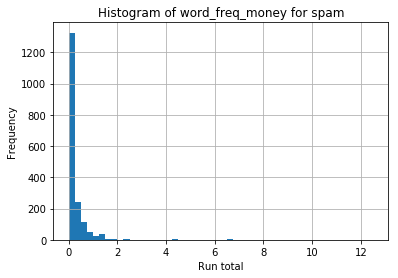

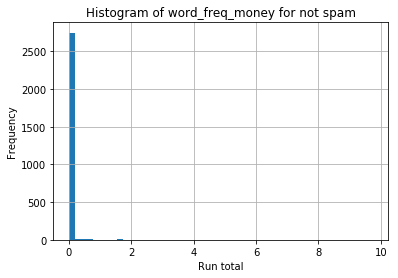

In [6]:
# histogram of values for the feature 'word_freq_money' for the class 'spam'
spambase[spambase['spam_class']==1].word_freq_money.hist(bins=50)
plt.title('Histogram of word_freq_money for spam')
plt.xlabel('Run total')
plt.ylabel('Frequency')
plt.show()

# histogram of values for the feature 'word_freq_money' for the class 'not spam'
spambase[spambase['spam_class']==0].word_freq_money.hist(bins=50)
plt.title('Histogram of word_freq_money for not spam')
plt.xlabel('Run total')
plt.ylabel('Frequency')
plt.show()


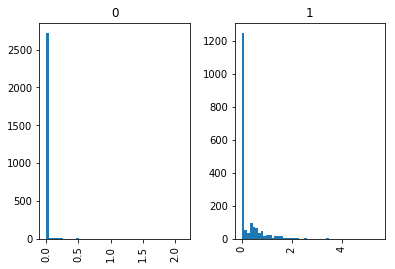

In [7]:
# one histogram for each class of values of feature 'word_freq_000'
spambase.word_freq_000.hist(by=spambase['spam_class'],bins=50)
plt.show()

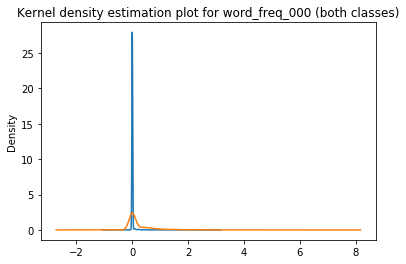

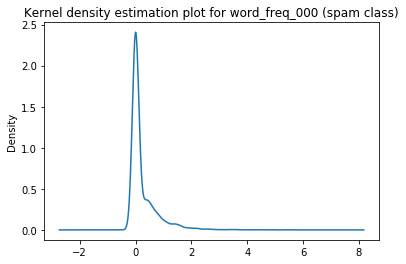

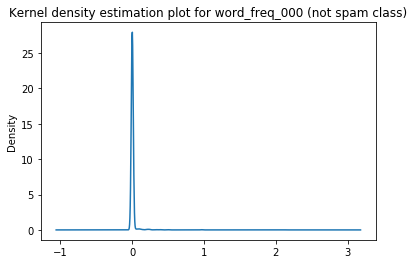

In [8]:
# kernel density estimation plot for feature 'word_freq_000' first both classes on same graph then separately

# a kernel density estimation plot estimates what the probability density function that would generat
# the observed values would look like

spambase.groupby('spam_class').word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (both classes)')
plt.show()

spambase[spambase['spam_class']==1].word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (spam class)')
plt.show()

spambase[spambase['spam_class']==0].word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (not spam class)')
plt.show()

#### Now let's do our logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# first we need to prepare the data

# add an intercept column
spambase['_intercept'] = 1

# Copy spambase across and drop spam_class (we don't include the class feature in the training data)
X = spambase
X = X.drop('spam_class', axis=1)

# Set y as the spam column, we need to wrap it in the dataframe to stop it being series 
y = pd.DataFrame(spambase.spam_class)

# flatten y into a 1-D array
y = np.ravel(y)

# now split the data into training data and test data (80/20 split)
# random_state = k sets a specific random seed
# since random_state is fixed, this call will always produce the same split
# if you leave out the random_state value, you will get a different random split when you run it agaimn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create our model and fit it to our training data
# the large C value essentail turns off regularization (which we will cover later)
# ignore it for now
logres = LogisticRegression(C = 1e9)
logres.fit(X_train,y_train)

# let's check our training and test accuracy
train_score = logres.score(X_train, y_train)
test_score = logres.score(X_test, y_test)

print ("Score on training data:", train_score)
print ("Score on test data:", test_score)

Score on training data: 0.932880434783
Score on test data: 0.909880564604


#### In the cell below, write code that computes and prints the mean of the training and test errors for ten RANDOM train/test splits

In [10]:
# compute and print the mean of the training and test errors for ten RANDOM train/test splits

training_errors = []
testing_errors = []

# run the logistic regression 10 different times
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    logres = LogisticRegression(C = 1e9)
    logres.fit(X_train, y_train)
    
    train_error = 1 - logres.score(X_train, y_train)
    test_error = 1 - logres.score(X_test, y_test)
    
    training_errors.append(train_error)
    testing_errors.append(test_error)

# compute the mean
avg_train_error = sum(training_errors) / len(training_errors)
avg_test_error = sum(testing_errors) /  len(testing_errors)

# print stuffs out
print("Average training error: ", avg_train_error)
print("Average testing error: ", avg_test_error)

Average training error:  0.0688043478261
Average testing error:  0.0737242128122


#### Let's look and try to understand our model's coefficients

In [11]:
# let's get back to our first fitted model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logres = LogisticRegression(C = 1e9)
logres.fit(X_train,y_train)

# examine the coefficients of our fitted model
column_names = np.asarray(X.columns.values)
m = X.columns.size
i = 0
while (i<m):
    print(logres.coef_[0,i], " * ",column_names[i])
    i = i + 1

-0.297670904444  *  word_freq_make
-0.138934113738  *  word_freq_address
0.177984950327  *  word_freq_all
1.85545736654  *  word_freq_3d
0.611385233426  *  word_freq_our
0.794960979974  *  word_freq_over
2.34015690336  *  word_freq_remove
0.485757046356  *  word_freq_internet
0.654377958162  *  word_freq_order
0.0761775150487  *  word_freq_mail
0.298012910164  *  word_freq_receive
-0.123799496513  *  word_freq_will
-0.0627818454939  *  word_freq_people
0.152993972032  *  word_freq_report
1.08963293396  *  word_freq_addresses
0.859713702876  *  word_freq_free
0.903531178117  *  word_freq_business
-0.0689773125843  *  word_freq_email
0.0948304827398  *  word_freq_you
0.819010326343  *  word_freq_credit
0.272627133976  *  word_freq_your
0.160429996086  *  word_freq_font
2.11127091865  *  word_freq_000
0.374602116509  *  word_freq_money
-1.79193352914  *  word_freq_hp
-1.40175322089  *  word_freq_hpl
-17.5890307744  *  word_freq_george
0.747136653758  *  word_freq_650
-2.16582074373  *  wo

#### Let's produce a nice looking confusion matrix

Confusion matrix, without normalization
[[503  35]
 [ 48 335]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.13  0.87]]


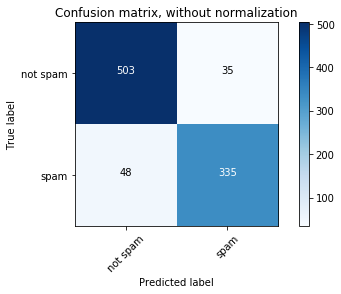

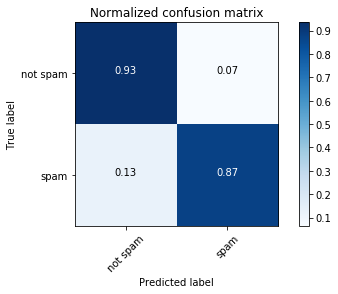

True positives: 335
True negatives: 503
False positives: 35
False negatives: 48


In [12]:
import itertools
from sklearn.metrics import confusion_matrix

# we need the actual predictions stored so we can generate the confusion matrix
y_pred = logres.fit(X_train, y_train).predict(X_test)

# plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = ['not spam','spam']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# We can get each value of the confusion matrix individually
# Let's assume the spam class is the positive class
print("True positives:",cnf_matrix[1,1])
print("True negatives:",cnf_matrix[0,0])
print("False positives:",cnf_matrix[0,1])
print("False negatives:",cnf_matrix[1,0])


#### Generate a new logisitic regression models.

Fit logres1 by fitting it to same data as logres with 2-3 of the features with large coefficient values dropped (can be either positive or negative or both)

After droppng the features and fitting the model, print the training and test accuracies and the coefficients. Examine the results for differences,

In [13]:
# drop things that look important
X1 = X
X1 = X1.drop('char_freq_$', axis=1)
X1 = X1.drop('word_freq_000', axis=1)
X1 = X1.drop('word_freq_george', axis=1)

# train it
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
logres1 = LogisticRegression(C = 1e9)
logres1.fit(X1_train,y_train)

# score it
train_score = logres1.score(X1_train, y_train)
test_score = logres1.score(X1_test, y_test)

# print it
print("Training score:", train_score)
print("Testing score:", test_score, "\n")

# examine the coefficients
column_names = np.asarray(X1.columns.values)
m = X1.columns.size
i = 0
while (i<m):
    print(logres.coef_[0,i], " * ",column_names[i])
    i = i + 1

Training score: 0.910326086957
Testing score: 0.895765472313 

-0.297670904444  *  word_freq_make
-0.138934113738  *  word_freq_address
0.177984950327  *  word_freq_all
1.85545736654  *  word_freq_3d
0.611385233426  *  word_freq_our
0.794960979974  *  word_freq_over
2.34015690336  *  word_freq_remove
0.485757046356  *  word_freq_internet
0.654377958162  *  word_freq_order
0.0761775150487  *  word_freq_mail
0.298012910164  *  word_freq_receive
-0.123799496513  *  word_freq_will
-0.0627818454939  *  word_freq_people
0.152993972032  *  word_freq_report
1.08963293396  *  word_freq_addresses
0.859713702876  *  word_freq_free
0.903531178117  *  word_freq_business
-0.0689773125843  *  word_freq_email
0.0948304827398  *  word_freq_you
0.819010326343  *  word_freq_credit
0.272627133976  *  word_freq_your
0.160429996086  *  word_freq_font
2.11127091865  *  word_freq_money
0.374602116509  *  word_freq_hp
-1.79193352914  *  word_freq_hpl
-1.40175322089  *  word_freq_650
-17.5890307744  *  word_fre

#### In the box below, write the code to generate and the ROC curves for logres and logres1 on the same graph.

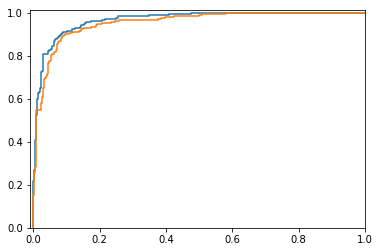

In [43]:
from sklearn.metrics import roc_curve

y_score = logres.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

y1_score = logres1.decision_function(X1_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y1_score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlim([-.01,1])
plt.ylim([0,1.01])
plt.show()

#### In the box below, write the code to compute and print the AUC for both curves.

In [47]:
from sklearn.metrics import auc

# write the AUC code here
lr_auc = auc(fpr, tpr)
print(lr_auc)

lr1_auc = auc(fpr1, tpr1)
print(lr1_auc)

0.965887582867
0.953487920642
